<a href="https://colab.research.google.com/github/shunrei9841-sudo/Guadalupe/blob/main/Actividad%2012%20de%20diciembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
# Definimos los coeficientes como símbolos
a1, a2, a3 = sp.symbols('a1 a2 a3')
alphas = [a1, a2, a3]

In [4]:
# Ecuación: -u'' + u - x = 0  => u'' - u = -x
u = sp.Function('u')
ode = u(x).diff(x, 2) - u(x) + x

# Solución exacta con condiciones de frontera
sol_exacta = sp.dsolve(ode, ics={u(0): 0, u(1): 0})
u_exacta_expr = sol_exacta.rhs
u_exacta_fn = sp.lambdify(x, u_exacta_expr, "numpy")

print("Solución Analítica:")
sp.pprint(u_exacta_expr)

Solución Analítica:
        x         -x 
     ℯ⋅ℯ       ℯ⋅ℯ   
x - ─────── + ───────
          2         2
    -1 + ℯ    -1 + ℯ 


In [5]:
# Definimos las funciones base beta_i(x) = sin(i*pi*x)
def beta(i, x):
    return sp.sin(i * sp.pi * x)

# Construimos u3(x)
u3 = sum(alphas[i-1] * beta(i, x) for i in range(1, 4))

# Definimos el Residuo E(x) basado en la EDO: -u'' + u - x = 0
# Nota: Usamos la forma original de la imagen
residuo = -sp.diff(u3, x, 2) + u3 - x

print("Residuo simbolizado (simplificado):")
residuo.simplify()

Residuo simbolizado (simplificado):


a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x) - x + pi**2*(a1*sin(pi*x) + 4*a2*sin(2*pi*x) + 9*a3*sin(3*pi*x))

In [6]:
# En Galerkin, el residuo debe ser ortogonal a cada función base
ecuaciones = []
for i in range(1, 4):
    # Integral del residuo por la función de peso (la misma base)
    integral = sp.integrate(residuo * beta(i, x), (x, 0, 1))
    ecuaciones.append(integral)

# Resolvemos para encontrar alpha_1, alpha_2, alpha_3
valores_alpha = sp.solve(ecuaciones, alphas)

# Sustituimos los valores en u3
u_num_expr = u3.subs(valores_alpha)
u_num_fn = sp.lambdify(x, u_num_expr, "numpy")

print("Coeficientes encontrados:")
print(valores_alpha)

Coeficientes encontrados:
{a1: 2/(pi + pi**3), a2: -1/(pi + 4*pi**3), a3: 2/(3*pi + 27*pi**3)}


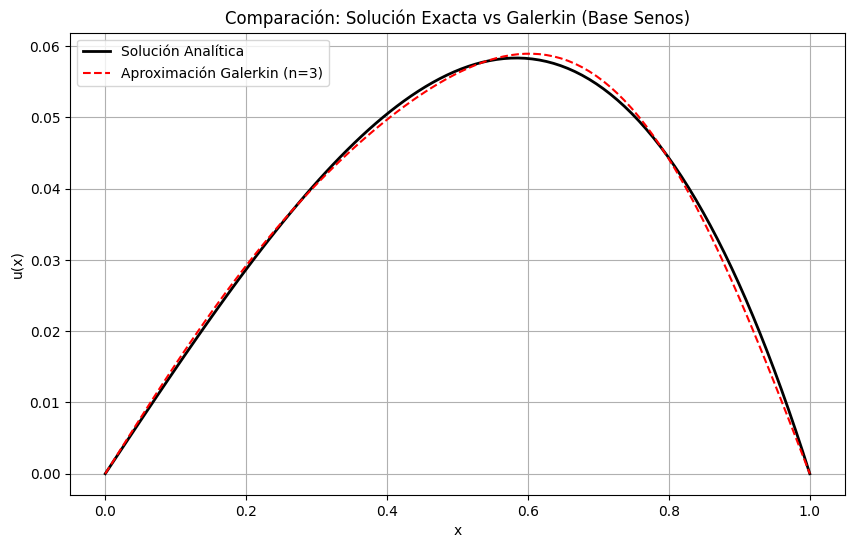

Error máximo: 1.981556e-03
Error cuadrático medio (RMS): 8.399495e-04


In [7]:
# Malla de puntos
xx = np.linspace(0, 1, 100)
yy_exacta = u_exacta_fn(xx)
yy_num = u_num_fn(xx)

# Graficación
plt.figure(figsize=(10, 6))
plt.plot(xx, yy_exacta, 'k-', label='Solución Analítica', linewidth=2)
plt.plot(xx, yy_num, 'r--', label='Aproximación Galerkin (n=3)')
plt.title('Comparación: Solución Exacta vs Galerkin (Base Senos)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del error
error_abs = np.abs(yy_exacta - yy_num)
print(f"Error máximo: {np.max(error_abs):.6e}")
print(f"Error cuadrático medio (RMS): {np.sqrt(np.mean(error_abs**2)):.6e}")